# UCBアルゴリズムのリグレットの証明

参考
* [Reinforcement Learning: Theory and Algorithms](https://rltheorybook.github.io/)
* [Upper Bound of $\sum_{k=1}^{n} \frac{1}{\sqrt{k}}$](https://math.stackexchange.com/questions/3745324/upper-bound-of-sum-k-1n-frac1-sqrtk)
* [Useful Inequalities Cheat Sheet](https://www.lkozma.net/inequalities_cheat_sheet/ineq.pdf)

探索が関わる強化学習アルゴリズムの証明はだいぶややこしいです。
その準備として、バンディット問題におけるUCBアルゴリズムの擬リグレットを簡潔に証明します。
今回の導出ではHigh-probability リグレットを考えますが、期待リグレットのは今回の導出について、$\delta$以下で成立するBadイベントを考えます。
面倒なので定数係数は全部$\square$でまとめます。

## K-Armed Bandit

次の問題設定を考えます。

問題設定

* アームの数：$K$
* 報酬：アーム$a \in {1,2,\ldots K}$について、報酬 $r_a \in [-1,1] \sim R(a) \in \Delta([-1,1])$。
* 平均報酬：$\mathbb{E}_{r_a \sim R(a)}\left[r_a\right]=\mu_a$であり、($\mu_a \in [-1,1]$)。
* (擬)リグレット： アーム$A_t \in [1,2,\ldots K]$に対して、
$$
R_T=T \cdot \max _i \mu_i-\sum_{t=0}^{T-1} \mu_{A_t}
$$

### UCBアルゴリズムの証明

\begin{aligned}
& \text { Algorithm } 3 \text { UCB } \\
& \text { 1: Play each arm once and denote received reward as } r_a \text { for all } a \in\{1,2, \ldots K\} \\
& \text { 2: for } t=1 \rightarrow T-K \text { do } \\
& \text { 3: } \quad \text { Execute arm } A_t=\arg \max _{a \in[K]}\left(\hat{\mu}_a^t+\sqrt{\frac{\log (T K / \delta)}{N_a^t}}\right) \\
& \text { 4: } \quad \text { Observe } r_t:=r_{A_t} \\
& \text { 5: end for }
\end{aligned}

[bandit_algorithms.ipynb](bandit_algorithms.ipynb)でも簡単な証明は与えましたが、ちゃんと書きます。
簡単のために、時刻$t=0$で全てのアームを一気に引くとして、$t>0$ではUCBを走らせるとします（こうしても一般性を失いません）。

参考
* [Reinforcement Learning: Theory and Algorithms](https://rltheorybook.github.io/)

#### 1. アームの報酬の推定

K-Armed Banditでは基本的にそれぞれの**アームの報酬の平均値**を推定します。このバウンドを導出しましょう。

* 時刻$t$時点のアーム$a$を引いた回数：$N_a^t=1+\sum_{i=1}^{t-1} \mathbf{1}\left\{A_i=a\right\}$
* 平均報酬の推定($r_a$は最初の回で引いた報酬。)：$\widehat{\mu}_a^t=\frac{1}{N_a^t}\left(r_a+\sum_{i=1}^{t-1} \mathbf{1}\left\{A_i=a\right\} r_i\right)$

まず、アーム$a$の推定値の幅を集中不等式で導出します。

$$
\begin{aligned}
\widehat{\mu}_a^t - \mu_a 
&= \frac{1}{N_a^t}\left(r_a+\sum_{i=1}^{t-1} \mathbf{1}\left\{A_i=a\right\} r_i - N_a^t \mu_a \right)\\
&= \frac{1}{N_a^t}\left(r_a - \mu_a + \sum_{i=1}^{t-1} \mathbf{1}\left\{A_i=a\right\} (r_i - \mu_a) \right)\\
\end{aligned}
$$

ここで、和の中身について、$X_0 = r_a - \mu_a$, $X_1 = \mathbf{1}\left\{A_K=a\right\} (r_K - \mu_a)$, ..., $X_i = \mathbf{1}\left\{A_{i}=a\right\} (r_{i} - \mu_a)$ とします。
また、$\mathcal{H}_{<i}$を$i$を含まない$i$までの履歴とすると、決定的なアルゴリズムについては$\mathbb{E}[X_i|\mathcal{H}_{<i}]=0$なので、$\sum_{i=0}^{t-1} X_i$はマルチンゲールです。

このようなマルチンゲールの系列に対して、次のAzuma-Hoeffdingのバウンドが使えます：

---
**定理：Azuma-Hoeffdingの不等式**

$\left(\mathcal{F}_n\right)_{n=1}^N$に対して可測な実数値確率過程$\left(X_n\right)_{n=1}^N$を考える. 
$X_n \in\left[l_n, u_n\right]$ かつ $\mathbb{E}_n\left[X_n\right]=0$ が任意の$n$でa.s.で成立するとする. 
このとき、
$$
P\left(\sum_{n=1}^N X_n \geq \sqrt{\sum_{n=1}^N \frac{\left(u_n-l_n\right)^2}{2} \log \frac{1}{\delta}}\right) \leq \delta
$$

---

これを使うと、固定された$a$と$t$について、$1-\delta$以上で次が成立します。
$$
\left|\widehat{\mu}_a^t-\mu_a\right|=\frac{1}{N_a^t}\left|\sum_{i=0}^{t-1} X_i\right|\leq \square \sqrt{\frac{\ln (1 / \delta)}{N_a^t}}
$$

つまり、
$$
P\left(\left|\widehat{\mu}_a^t-\mu_a\right|\geq \square \sqrt{\frac{\ln (TK / \delta)}{N_a^t}}\right) \leq \frac{\delta}{TK}
$$
です (ホントは$\square$をちゃんと書かないとダメです)。


最後にUnion boundを$0\leq t \leq T$と$a\in \{1, \dots, K\}$で取れば、任意の$a$と$t$について
$$
P\left(\left|\widehat{\mu}_a^t-\mu_a\right|\geq \square \sqrt{\frac{\ln (TK / \delta)}{N_a^t}}\right) \leq {\delta}
$$
です。

#### 2. リグレットのバウンド

* 条件：1.のバウンドが成り立っているとき

ここまで来たらあとはリグレットをバウンドするだけです。
リグレットは$$\sum_{t=0}^{T-1} \mu_{a^{\star}}-\mu_{A_t}$$だったので、$\mu_{a^{\star}}-\mu_{A_t}$をバウンドすればほとんどゴールです。


１で求めたバウンドが成り立っている事象を考えましょう。つまり、任意の$a$と$t$について、
$$
\mu_a \leq \widehat{\mu}_a^t + \square \sqrt{\frac{\ln (TK / \delta)}{N_a^t}}
$$
が確率$1-\delta$で成り立っています。

ここで、アルゴリズムに戻ってみましょう。アルゴリズムの３行目を見直すと
$$
\text { 3: } \quad \text { Execute arm } A_t=\arg \max _{a \in[K]}\left(\hat{\mu}_a^t+\sqrt{\frac{\log (T K / \delta)}{N_a^t}}\right)
$$
より、時刻$t$で引かれるアームはUCBスコア($\widehat{\mu}_a^t + \square \sqrt{\frac{\ln (TK / \delta)}{N_a^t}}
$)が一番大きいものでした。
さらに事象$G$が成立してるので、時刻$t$で引かれるアーム$A_t$については

$$
\mu_{a^\star} \leq \widehat{\mu}_{a^\star}^t + \square \sqrt{\frac{\ln (TK / \delta)}{N_{a^\star}^t}} \leq \widehat{\mu}_{A_t}^t + \square \sqrt{\frac{\ln (TK / \delta)}{N_{A_t}^t}}
$$

が成り立っています。変形して、

$$
\mu_{a^\star} - {\mu}_{A_t} 
\leq \widehat{\mu}_{A_t}^t - \mu_{A_t} + \square \sqrt{\frac{\ln (TK / \delta)}{N_{A_t}^t}}
\leq \square \sqrt{\frac{\ln (TK / \delta)}{N_{A_t}^t}}
$$
です。最後の不等式では$2\square$を$\square$にまとめました。

最後に、
$$
\sum_{t=0}^{T-1} \mu_{a^{\star}}-\mu_{A_t} \leq \square\sqrt{\ln (T K / \delta)} \sum_{t=0}^{T-1} \sqrt{\frac{1}{N_{A_t}^t}} 
$$
であり、ここで、$$\sum_{t=0}^{T-1} \sqrt{\frac{1}{N_{A_t}^t}}=\sum_a \sum_{i=1}^{N_a^T} \frac{1}{\sqrt{i}} \leq 2\sum_a \sqrt{{N_a^T}} \leq 2\sqrt{K \sum_a {N_a^T}}$$です (１つ目の不等式は[Upper Bound of $\sum_{k=1}^{n} \frac{1}{\sqrt{k}}$](https://math.stackexchange.com/questions/3745324/upper-bound-of-sum-k-1n-frac1-sqrtk)参考。２つ目の不等式はコーシー・シュワルツか平均の不等式を使います。[Useful Inequalities Cheat Sheet](https://www.lkozma.net/inequalities_cheat_sheet/ineq.pdf)参考)。
よって、
$$
\sum_{t=0}^{T-1} \mu_{a^{\star}}-\mu_{A_t} \leq \square \sqrt{\ln (T K / \delta)} \sqrt{K \sum_a N_a^T}
\leq \square \sqrt{KT \ln (T K / \delta)}
$$
が導かれます。

最初に$K$回アームを引くことを仮定したので、結局リグレットバウンドは

$$
R_T \leq \mathcal{O}\left(\sqrt{KT \ln (T K / \delta)} + K\right)
$$
になります。


#### 3. Gapに依存したバウンド

最適アームと他のアームのGapが大きい場合、バンディット問題がやさしくなるような気がしますね。Gapに依存したバウンドは求まらないでしょうか？
まず、Gapを定義します
* ギャップ：$a^{\star}=\operatorname{argmax}_i \mu_i$について$\Delta_a = \mu_{a^{\star}} - \mu_a$

このとき、リグレットは

$$
R_T=T \cdot \max _i \mu_i-\sum_{t=0}^{T-1} \mu_{A_t} \leq \sum_{a\neq a^*} N_a^T \Delta_a
$$

なので、$N_a^T$のバウンドを出せば良いことがわかります。
一方で、２の途中の議論から、任意の$t$で
$$
\Delta_{A_t} = \mu_{a^\star} - {\mu}_{A_t} 
\leq \square \sqrt{\frac{\ln (TK / \delta)}{N_{A_t}^t}}
\Rightarrow 
N_{a}^T \leq \square {\frac{\ln (TK / \delta)}{\Delta_a^2}}
$$
なので、
$$
R_T\leq \square \sum_{a\neq a^*}{\frac{\ln (TK / \delta)}{\Delta_a}}
$$
であり、２と合体させると、

$$
R_T \leq \mathcal{O}\left(\min\left(\sqrt{KT \ln (T K / \delta)}, \sum_{a\neq a^*}{\frac{\ln (TK / \delta)}{\Delta_a}}\right) + K\right)
$$
になります。

簡単にPythonで確認してみましょう

  0%|          | 0/30 [00:00<?, ?it/s]/tmp/ipykernel_79306/3047913655.py:29: RuntimeWarning: divide by zero encountered in divide
  ucb = np.where(num_arm_pulled == 0, np.infty, avg_rewards + np.sqrt(np.log(T*K / delta) / num_arm_pulled))
100%|██████████| 30/30 [00:00<00:00, 151.79it/s]


Text(0.5, 1.0, 'Regret w.r.t. K')

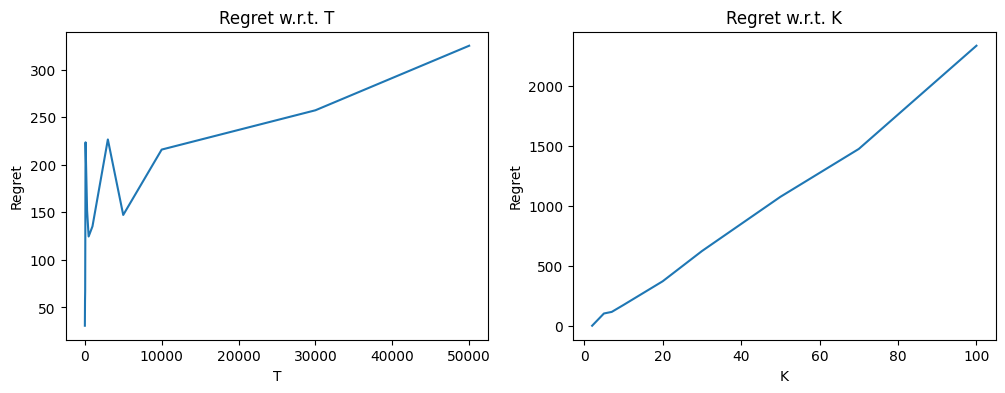

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
Array = np.ndarray


class GaussianBandit:
    def __init__(self, rew_mean: Array, noise_scale: Array):
        self.rew_mean = rew_mean
        self.noise_scale = noise_scale
        self.optimal_mean = np.max(self.rew_mean)

    def pull(self, arm: int):
        mean = self.rew_mean[arm]
        noise = np.random.randn() * self.noise_scale[arm]
        reward = mean + noise
        return mean, reward


def upper_confidence_bound(bandit, K, T, delta, seeds=10):
    avg_rewards = np.zeros(K)
    num_arm_pulled = np.zeros(K)

    pseudo_regret = 0
    regrets = []
    for _ in tqdm(range(seeds)):
        for i in range(T):
            # UCBスコアの計算と行動選択
            ucb = np.where(num_arm_pulled == 0, np.infty, avg_rewards + np.sqrt(np.log(T*K / delta) / num_arm_pulled))
            act = np.argmax(ucb)
            mean, rew = bandit.pull(act)

            # 平均値と探索結果の記録
            num_pulled = num_arm_pulled[act]
            avg_rewards[act] += (rew - avg_rewards[act]) / (num_pulled + 1)
            num_arm_pulled[act] += 1

            # 結果の記録
            pseudo_regret += bandit.optimal_mean - mean
        regrets.append(pseudo_regret)
    return np.mean(regrets)


# Tを変化した比較
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
K = 10
delta = 0.1
regrets = []
gap = 0.5
mean = np.zeros(K)
mean[0] = gap
noise_scale = np.ones(K)
bandit = GaussianBandit(mean, noise_scale)
Ts = [10, 30, 50, 100, 300, 500, 1000, 3000, 5000, 10000, 30000, 50000]

for T in Ts:
    regrets.append(upper_confidence_bound(bandit, K, T, delta, seeds=30))

plt.plot(Ts, regrets)
plt.ylabel("Regret")
plt.xlabel("T")
plt.title("Regret w.r.t. T")


# Kを変化した比較
plt.subplot(1, 2, 2)
T = 1000
delta = 0.1
regrets = []
gap = 0.5
mean = np.zeros(K)
mean[0] = gap
noise_scale = np.ones(K)
bandit = GaussianBandit(mean, noise_scale)
Ks = [2, 5, 7, 10, 20, 30, 50, 70, 100]

for K in Ks:
    mean = np.zeros(K)
    mean[0] = gap
    noise_scale = np.ones(K)
    bandit = GaussianBandit(mean, noise_scale)
    regrets.append(upper_confidence_bound(bandit, K, T, delta, seeds=30))

plt.plot(Ks, regrets)
plt.ylabel("Regret")
plt.xlabel("K")
plt.title("Regret w.r.t. K")

Regretは$T$については$\sqrt{T}$で、$K$については線形に増えていきます。